$NonLinearRelationships$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

D:\jupiter\envs\udemy_ml_python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = boston_data.target

Introduction to Decision Tree

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
X = df[['LSTAT']].values

In [7]:
tree = DecisionTreeRegressor(max_depth = 5)

In [8]:
tree.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [9]:
sort_idx = X.flatten().argsort()
#X comes in as a vector, flattening it means converting it into an array

Text(0, 0.5, 'MEDV')

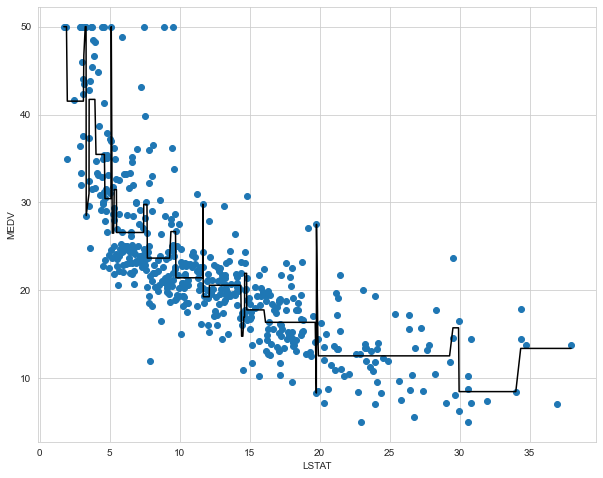

In [10]:
plt.figure(figsize = (10, 8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

The black line drawn is the prdicted decision line for the given 2 columsn of data. The data is sorted to ensure that the decision line is accurate. When the depth is 5 we see that the decision line is all over the graph which is not too good, this is basically a overfitting model. To solve this problem we reduce the depth (trial and error method to get the best depth)

Introduction to Random Forest

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X = df.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, n_jobs=-1)

In [16]:
forest.fit(X_train, y_train)

D:\jupiter\envs\udemy_ml_python\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', n_estimators=500, n_jobs=-1,
                      random_state=42)

In [17]:
y_train_pred = forest.predict(X_train)

In [18]:
y_test_pred = forest.predict(X_test)

In [19]:
print("MSE Train: {0:.4f}, test: {0:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE Train: 1.8753, test: 1.8753


In [20]:
print("R^2 Train: {0:.4f}, test: {0:.4f}".\
      format(r2_score(y_train, y_train_pred), 
             r2_score(y_test, y_test_pred)))

R^2 Train: 0.9787, test: 0.9787


Introduction to AdaBoost

In [21]:
from sklearn.ensemble import AdaBoostRegressor

In [22]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, random_state=42)

In [23]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=500, random_state=42)

In [24]:
y_train_pred = ada.predict(X_train)

In [25]:
y_test_pred = ada.predict(X_test)

In [26]:
print("MSE Train: {0:.4f}, test: {0:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE Train: 4.4567, test: 4.4567


In [27]:
print("R^2 Train: {0:.4f}, test: {0:.4f}".\
      format(r2_score(y_train, y_train_pred), 
             r2_score(y_test, y_test_pred)))

R^2 Train: 0.9493, test: 0.9493


Notice for this case AdaBoost did not work as weel as RandomForest 

Revisiting Boston Data to Check Which Feature is More Dominant

Type 1 -> AdaBoost

In [29]:
ada.feature_importances_

array([0.03284169, 0.0017967 , 0.01146074, 0.00209209, 0.03897159,
       0.24219268, 0.01057968, 0.13055771, 0.01554554, 0.02348895,
       0.04072215, 0.02430303, 0.42544745])

In [30]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [31]:
results = pd.DataFrame(ada.feature_importances_, df.columns)
results.columns = ['feature']

In [32]:
results.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.425447
RM,0.242193
DIS,0.130558
PTRATIO,0.040722
NOX,0.038972
CRIM,0.032842
B,0.024303
TAX,0.023489
RAD,0.015546
INDUS,0.011461


<AxesSubplot:>

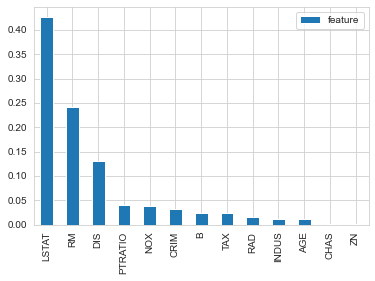

In [34]:
results.sort_values(by='feature', ascending=False).plot(kind='bar')

Type 2 -> RandomForest

In [35]:
forest.feature_importances_

array([0.03204822, 0.00160483, 0.00700703, 0.00125804, 0.01475089,
       0.40389139, 0.01410918, 0.06287534, 0.00515063, 0.01197446,
       0.01821116, 0.01241787, 0.41470096])

<AxesSubplot:>

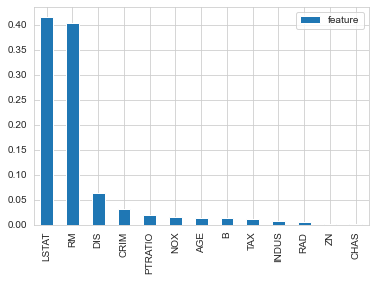

In [37]:
result = pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar')

Lets try Decision Tree for the boston data

In [38]:
X = df.values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [40]:
d_tree = DecisionTreeRegressor(max_depth=5)

In [41]:
d_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [50]:
y_train_pred = d_tree.predict(X_train)
y_test_pred = d_tree.predict(X_test)

In [54]:
#MSE Score
print("MSE of Training is {0:.4f}, MSE of Testing is {0:.4f}".\
      format(mean_squared_error(y_train, y_train_pred),
             mean_squared_error(y_test, y_test_pred)))

MSE of Training is 6.3532, MSE of Testing is 6.3532


In [55]:
#R^2 score
print("R^2 of Training is {0:.4f}, R^2 score of testing is {0:.4f}".\
      format(r2_score(y_train, y_train_pred), 
             r2_score(y_test, y_test_pred)))

R^2 of Training is 0.9277, R^2 score of testing is 0.9277


In [59]:
d_tree.feature_importances_

array([0.03404847, 0.        , 0.00477547, 0.        , 0.00356871,
       0.61024907, 0.00397606, 0.10990886, 0.01865515, 0.        ,
       0.        , 0.01992202, 0.1948962 ])

<AxesSubplot:>

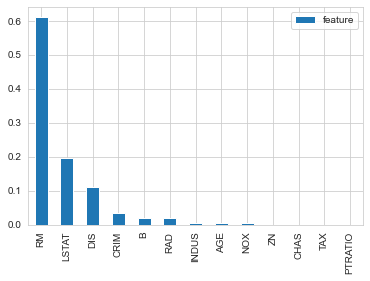

In [60]:
result = pd.DataFrame(d_tree.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar')

Conclusion:
    
    AdaBoost -> LSTAT has highest importance
    
    Forest -> LSTAT has highest importance (few changes wrt AdaBoost can be seen for further features)
    
    Decision Tree -> RM has highest Feature Importance